# **Simulação de Evento de Microlentes Gravitacionais**
* PET - Física
* Petianos: Ylana Karolina Santos Lopes
* Data: ?? de ?? de 2024

O objetivo desse `notebook` é discutir um pouco sobre as microlentes gravitacionais através de uma simulação de um evento com lentes iguais de mesma massa e produzir uma curva de luz artificial da mesma. Ao longo do texto, trataremos um pouco da teoria por trás das microlentes, mas sem adentrar em relatividade geral, de forma que não é necessário conhecimento prévio no assunto. Com isso, o `notebook` será organizado da seguinte forma:

1. *Introdução*;
2. *Distribuição de Arquimendes*;
2. *Teoria das Microlentes*;
3. *Simulação*.

## Importando biblioteca

In [16]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [21]:
%load_ext version_information
%version_information matplotlib, numpy

Software versions
Python 3.12.2 64bit [GCC 12.3.0]
IPython 8.25.0
OS Linux 6.8.0 45 generic x86_64 with glibc2.35
matplotlib 3.8.4
numpy 1.26.4
Wed Oct 02 19:27:10 2024 -03

In [17]:
# Aqui é só uma função para formatar as figuras e o código ficar menos poluído.
def format():
    plt.figure(figsize=(6,6))
    plt.tick_params(direction='in', which = 'both', bottom = 1, top =1, left = 1, right = 1)
    return
    

In [18]:
def arquimedes(num_points):
    
    golden_angle = np.pi * (3 - np.sqrt(5))
    
    theta = golden_angle * np.arange(num_points)
    
    r = np.sqrt(theta)
    
    x = r * np.cos(theta)/(num_points/1000)
    y = r * np.sin(theta)/(num_points/1000)

    return x, y

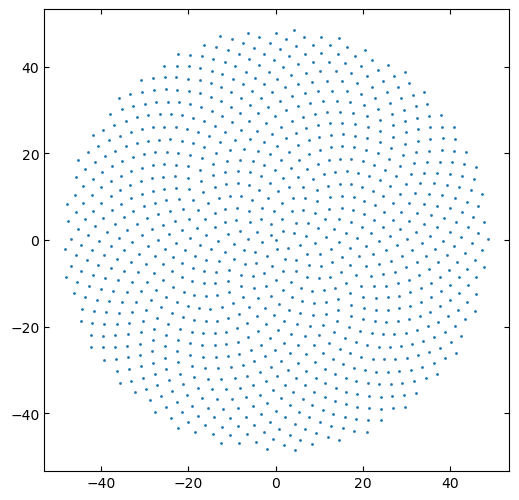

In [173]:
format()
x, y = arquimedes(1000)
plt.scatter(x,y, s = 1)

In [169]:
class Body:
    def __init__(self, massa_frac, position):
        self.massa_frac = massa_frac
        self.position = np.array(position, dtype='float64')


In [170]:

def cart(zix, ziy, body1, body2):
    e1 = body1.massa_frac     #=> fração da massa 
    r1x = body1.position[0]    #=> posição da lente j em relação a origem
    r1y = body1.position[1] 
    e2 = body2.massa_frac      #=> fração da massa 
    r2x = body2.position[0]
    r2y = body2.position[1]


    zfx = zix - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(zix - r1x) - (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(zix - r2x)
    zfy = ziy - (e1/np.sqrt((zix-r1x)**2 + (ziy-r1y)**2))*(ziy - r1y)- (e2/np.sqrt((zix-r2x)**2 + (ziy-r2y)**2))*(ziy - r2y)
    return zfx, zfy

In [182]:
## define 2 bodies 

corpo_1 = Body(0.5, [-0.75, 0])
corpo_2 = Body(0.5, [0.75, 0])

zix, ziy = arquimedes(500000)

x1, y1 = cart(zix, ziy, corpo_1, corpo_2)

(-2.0, 2.0)

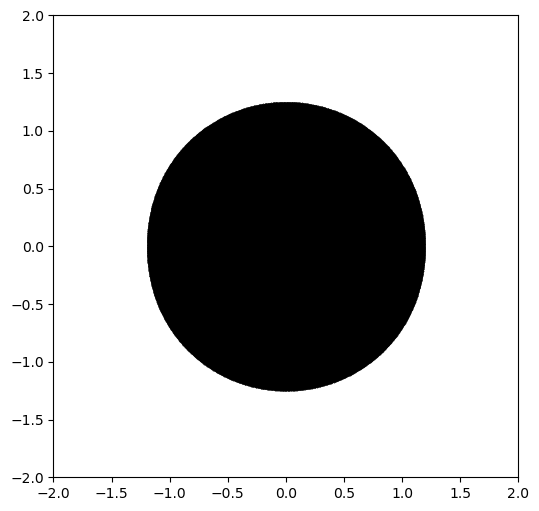

In [183]:

plt.figure(figsize=(6, 6))
plt.scatter(x1, y1, s = 0.1, c = 'black')
plt.xlim(-2,2)
plt.ylim(-2,2)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-1.19046775e+00, -1.18706614e+00, -1.18366453e+00, -1.18026292e+00,
        -1.17686132e+00, -1.17345971e+00, -1.17005810e+00, -1.16665649e+00,
        -1.16325488e+00, -1.15985327e+00, -1.15645166e+00, -1.15305005e+00,
        -1.14964844e+00, -1.14624683e+00, -1.14284522e+00, -1.13944361e+00,
        -1.13604200e+00, -1.13264039e+00, -1.12923878e+00, -1.12583717e+00,
        -1.12243556e+00, -1.11903395e+00, -1.11563234e+00, -1.11223073e+00,
        -1.10882912e+00, -1.10542751e+00, -1.10202590e+00, -1.09862429e+00,
        -1.09522268e+00, -1.09182107e+00, -1.08841946e+00, -1.08501785e+00,
        -1.08161624e+00, -1.07821463e+00, -1.07481302e+00, -1.07141141e+00,
        -1.06800980e+00, -1.06460819e+00, -1.06120658e+00, -1.05780

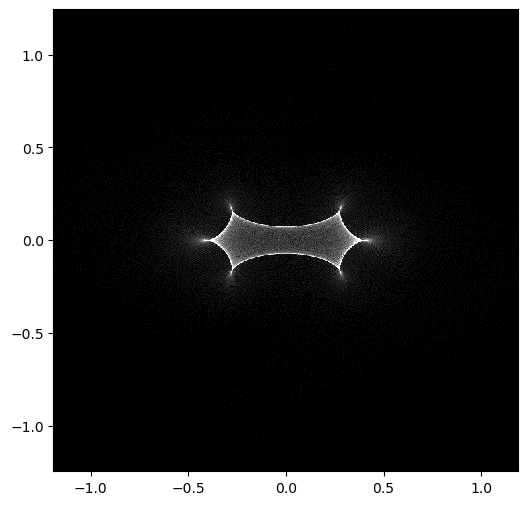

In [184]:
plt.figure(figsize=(6, 6))
plt.hist2d(x1, y1, bins = 700,  cmap ="binary_r", vmin=1, vmax=20)


In [185]:
grid_size = 0.01
x_edges = np.arange(-1.5, 1.5, grid_size)
y_edges = np.arange(-1.5, 1.5, grid_size)

hist, xedges, yedges = np.histogram2d(x1, y1, bins=[x_edges, y_edges])

# Calculate bin width and height
bin_width = x_edges[1] - x_edges[0]
bin_height = y_edges[1] - y_edges[0]

In [186]:
passo = 1000
alpha = 0.8
inter = 0
b = inter/np.cos(alpha)

xp = np.linspace(-1.5, 1.5, passo)
yp = np.tan(alpha)*xp + b

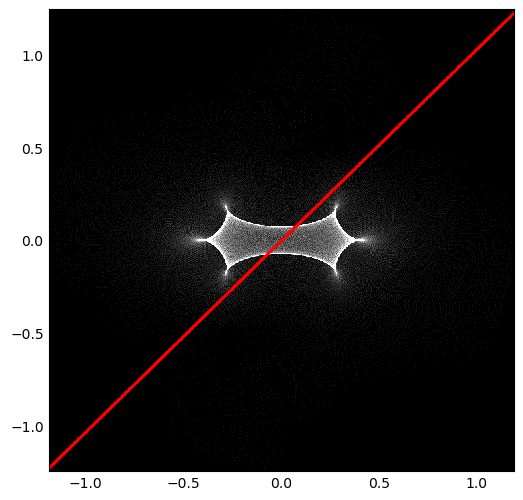

In [187]:
format()
plt.hist2d(x1, y1, bins = 700,  cmap ="binary_r", vmin=1, vmax=14)
plt.scatter(xp, yp, s = 1, c = 'red')
# plt.xlim(-1., 1.)
# plt.ylim(-1.,1.)


In [188]:
density = []

for i in range(0,passo):
    point_x = xp[i]
    point_y = yp[i]

    x_bin = np.digitize(point_x, x_edges) - 1
    y_bin = np.digitize(point_y, y_edges) - 1

    x_bin = min(max(x_bin, 0), hist.shape[0] - 1)
    y_bin = min(max(y_bin, 0), hist.shape[1] - 1)

    num_points_in_bin = hist[x_bin, y_bin]

    density_1 = num_points_in_bin / (bin_width * bin_height)
    density.append(density_1)

Text(0.5, 0, 'x')

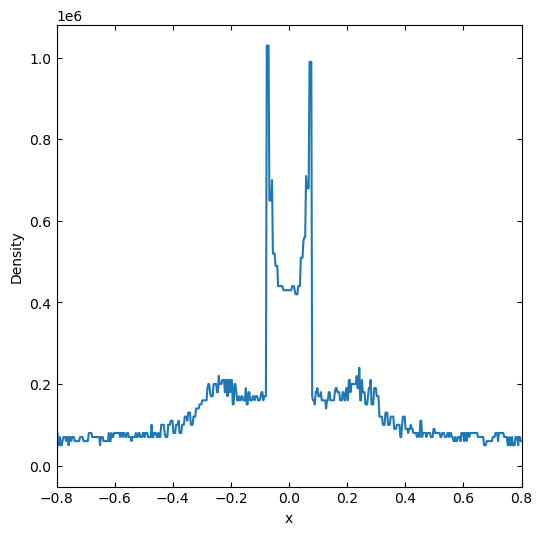

In [189]:
format()
plt.plot(xp, density)
plt.ylabel("Density")
plt.xlim(-.80, .80)
plt.xlabel("x")

In [190]:
# Define a moving average kernel
window_size = 5
kernel = np.ones(window_size) / window_size

# Perform convolution to smooth the data
density_smooth = np.convolve(density, kernel, mode='same')

Text(0.5, 0, 'x')

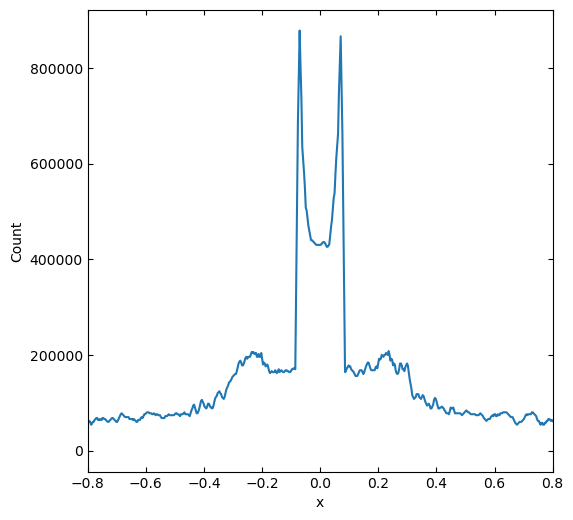

In [191]:
format()
plt.plot(xp, density_smooth)
plt.ylabel("Count")
plt.xlim(-.80, .80)
plt.xlabel("x")

## Referências

In [ ]:
[1] 